# water marking on images

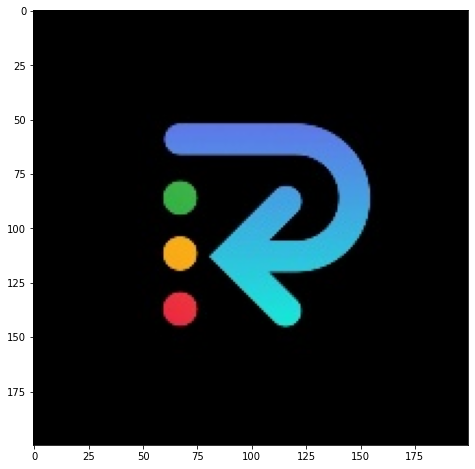

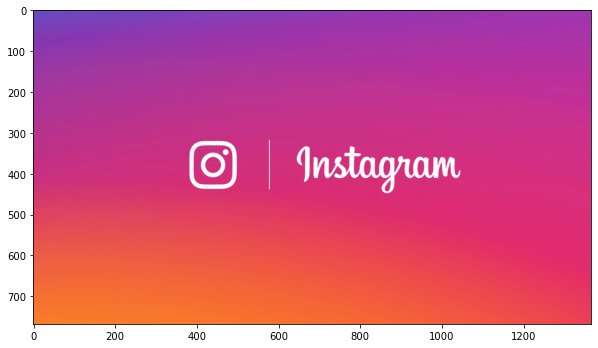

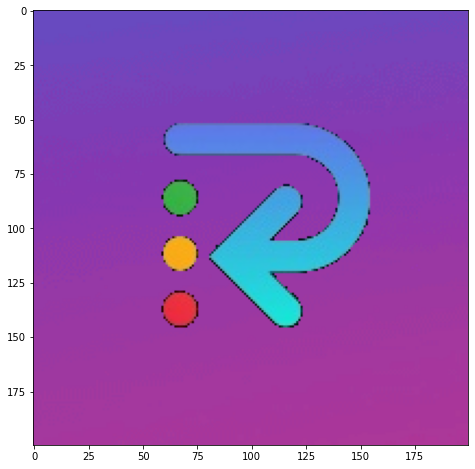

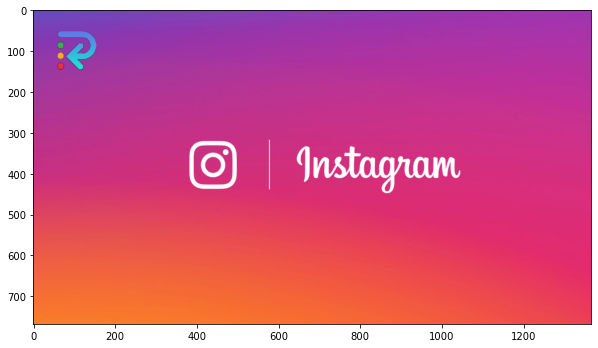

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display(img):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img)

def color_conv(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

logo=cv2.imread("D://OpenCV//images//pro.jpg")
wm=cv2.imread("D://OpenCV//instagram.png")

display(color_conv(logo))
display(color_conv(wm))

rows,cols,channels=logo.shape
roi = wm[0:rows, 0:cols]

img_gray=cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)
ret,mask=cv2.threshold(img_gray,10,255,cv2.THRESH_BINARY)
mask_inv=cv2.bitwise_not(mask)

bg=cv2.bitwise_and(roi,roi,mask = mask_inv)
fg=cv2.bitwise_and(logo,logo,mask=mask)

dst=cv2.add(fg,bg)
wm[0:rows, 0:cols]=dst
cv2.resize(wm,(300,100))
display(color_conv(dst))
display(color_conv(wm))

cv2.waitKey()
cv2.destroyAllWindows()
cv2.imshow("watermarked",wm)